In [1]:
import windrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from windrose import WindroseAxes

In [2]:
df = pd.read_csv("PCD GALINHOS.csv",sep=";",skiprows=4)

In [3]:
df.head()

,Data,Corrente do painel solar,Porta aberta,Precipitação (mm),Pressão (hPa),Radiação global (W/m²),Radiação global máxima (W/m²),Radiação global mínima (W/m²),Temperatura (ºC),Temperatura máxima (ºC),...,Umidade máxima (%),Umidade mínima (%),Umidade do solo (%),Umidade máxima do solo (%),Umidade mínima do solo (%),Velocidade do vento à 2m (m/s),Direção do vento,Velocidade do vento (m/s),Velocidade máxima do vento (m/s),Velocidade mínima do vento (m/s)
0,14/11/2018 13:00,--,"0,00","0,00","1009,20","804,00","1195,00","194,00","31,30","31,80",...,"61,00","52,00","3,00","3,00","3,00","4,90","61,00","6,60","8,70","4,20"
1,14/11/2018 14:00,--,"0,00","0,00","1008,20","776,00","1053,00","208,00","30,70","31,20",...,"65,00","60,00","3,00","3,00","3,00","6,10","63,00","8,10","10,90","5,50"
2,14/11/2018 15:00,--,"0,00","0,00","1007,40","527,00","812,00","282,00","30,10","30,70",...,"71,00","62,00","3,00","3,00","3,00","6,60","64,00","8,80","10,50","6,40"
3,14/11/2018 16:00,--,"0,00","0,00","1007,60","247,00","488,00","175,00","29,30","29,60",...,"73,00","68,00","3,00","3,00","3,00","5,80","70,00","7,70","10,20","4,90"
4,14/11/2018 17:00,--,"0,00","0,00","1007,90","91,00","189,00","42,00","29,90","30,60",...,"73,00","52,00","2,00","3,00","2,00","4,90","83,00","6,50","8,60","5,00"


In [5]:
# selecionar as colunas para análise
df_s = df[["Direção do vento ", "Velocidade do vento à 2m (m/s)"]]

In [6]:
df_s.head()

,Direção do vento,Velocidade do vento à 2m (m/s)
0,"61,00","4,90"
1,"63,00","6,10"
2,"64,00","6,60"
3,"70,00","5,80"
4,"83,00","4,90"


In [7]:
df_s.loc[:, 'Velocidade do vento à 2m (m/s)'] = df_s['Velocidade do vento à 2m (m/s)'].astype(str).str.replace(',', '.')

In [8]:
df_s.loc[:, 'Direção do vento '] = df_s['Direção do vento '].astype(str).str.replace(',', '.')

In [9]:
# tranformar em float o dado "object" na coluna "Velocidade do vento à 2m (m/s)"
df_s["Velocidade do vento à 2m (m/s)"] = pd.to_numeric(df_s["Velocidade do vento à 2m (m/s)"], errors = "coerce")

/tmp/ipykernel_90792/460464237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["Velocidade do vento à 2m (m/s)"] = pd.to_numeric(df_s["Velocidade do vento à 2m (m/s)"], errors = "coerce")


In [10]:
# tranformar em float o dado "object" na coluna "Velocidade do vento à 2m (m/s)"
df_s["Direção do vento "] = pd.to_numeric(df_s["Direção do vento "], errors = "coerce")

/tmp/ipykernel_90792/1305643772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s["Direção do vento "] = pd.to_numeric(df_s["Direção do vento "], errors = "coerce")


In [11]:
df_s.dtypes

Direção do vento                  float64
Velocidade do vento à 2m (m/s)    float64
dtype: object

In [13]:
df_s["Velocidade do vento à 2m (m/s)"].dropna()
df_s["Direção do vento "].dropna()

0        61.0
1        63.0
2        64.0
3        70.0
4        83.0
         ... 
38550    68.0
38551    60.0
38552    60.0
38553    64.0
38554    92.0
Name: Direção do vento , Length: 38555, dtype: float64

In [15]:
df_s["Velocidade do vento à 2m (m/s)"].describe()

count    38555.000000
mean         2.797124
std          1.252597
min          0.200000
25%          1.800000
50%          2.600000
75%          3.500000
max          7.600000
Name: Velocidade do vento à 2m (m/s), dtype: float64

In [16]:
df_s["Direção do vento "].describe()

count    38555.000000
mean       113.889379
std         38.212060
min          1.000000
25%         92.000000
50%        119.000000
75%        139.000000
max        360.000000
Name: Direção do vento , dtype: float64

In [17]:
velocidade = df_s["Velocidade do vento à 2m (m/s)"].to_numpy()

In [19]:
direcao = df_s["Direção do vento "].to_numpy()

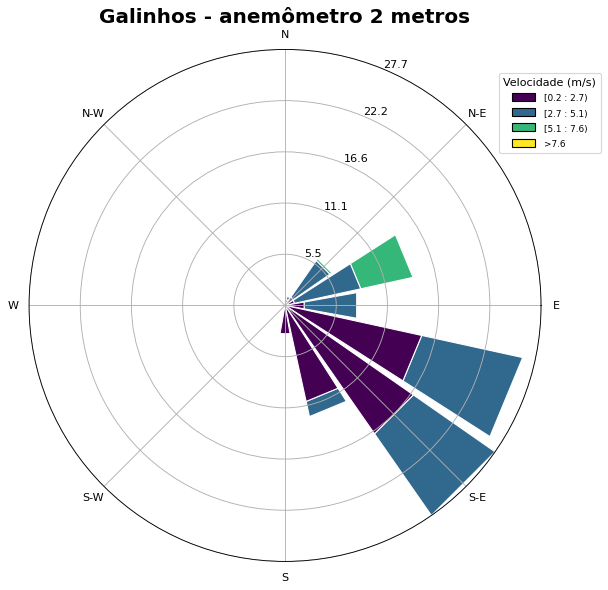

In [22]:
ax = WindroseAxes.from_ax()
ax.bar(direcao, velocidade, normed=True, opening=0.9, edgecolor="white", bins = 4)
#ax.set_legend(title="Velocidade (m/s)")
plt.title("Galinhos - anemômetro 2 metros", fontsize=18, color='black', fontweight='bold')
legend = ax.set_legend(title="Velocidade (m/s)")
legend.set_bbox_to_anchor((0.92, 0.8))  # Ajuste as coordenadas conforme necessário
plt.savefig('rosa_galinhos_ane_2m.png')